In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
try:
    import emoji #If tweepy is already installed on the system
except:
    !pip install emoji
    import emoji

!pip install nltk
#import nltk package for text processing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold,GridSearchCV
from sklearn.preprocessing import StandardScaler 
import re
import requests
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:

# load the meta data from the CSV file 
df=pd.read_csv('metadata.csv', usecols=['title','abstract','authors','doi','publish_time'])
print (df.shape)

#drop duplicates
df = df.drop_duplicates(subset='abstract', keep="first")

#drop NANs 
df=df.dropna()

# convert abstracts to lowercase
df["abstract"] = df["abstract"].str.lower()

#show 10 lines of the new dataframe
print (df.shape)
df.head(5)

(45774, 5)
(34809, 5)


,title,doi,abstract,publish_time,authors
0,SIANN: Strain Identification by Alignment to N...,10.1101/001727,next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...
1,Spatial epidemiology of networked metapopulati...,10.1101/003889,an emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li
2,Sequencing of the human IG light chain loci fr...,10.1101/006866,germline variation at immunoglobulin gene (ig)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...
3,Bayesian mixture analysis for metagenomic comm...,10.1101/007476,deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol
4,Mapping a viral phylogeny onto outbreak trees ...,10.1101/010389,developing methods to reconstruct transmission...,2014-11-11,Stephen P Velsko; Jonathan E Allen


## DATA CLEANING:

  HERE WE REMOVET HE STOP WORDS IN THE ARTICLES ABSTARCT AND WE ALSO PERFORM LEMMATIZATION ON THE ARTICLES ABSTRACT 

In [3]:
def stp(x):
    tokenizer = RegexpTokenizer(r'\w+')   
    b = tokenizer.tokenize(x)
    l1= [i for i in b if i not in stopwords.words('english')]
    return (l1)

In [4]:
df["abstract1"] = df["abstract"].apply(lambda x : stp(x))

In [5]:
df.head(10)
l1=df["abstract1"]

In [6]:
#remove punctuation signs from tokens
table = str.maketrans('', '', string.punctuation)
l2=[]
for i in l1:
  word_tokens = [word.translate(table) for word in i]
  l2.append(word_tokens)
print(l2[10])

['viruses', 'interact', 'hundreds', 'thousands', 'proteins', 'mammals', 'yet', 'adaptation', 'viruses', 'studied', 'proteins', 'specialized', 'antiviral', 'defense', 'whether', 'adaptation', 'viruses', 'typically', 'involves', 'specialized', 'antiviral', 'proteins', 'affects', 'broad', 'array', 'proteins', 'unknown', 'analyze', 'adaptation', '1', '300', 'virus', 'interacting', 'proteins', 'manually', 'curated', 'set', '9', '900', 'proteins', 'conserved', 'across', 'mammals', 'show', 'viruses', 'use', 'evolutionarily', 'constrained', 'proteins', 'cellular', 'functions', 'hijack', 'ii', 'despite', 'high', 'constraint', 'virus', 'interacting', 'proteins', 'account', 'high', 'proportion', 'protein', 'adaptation', 'humans', 'mammals', 'adaptation', 'elevated', 'virus', 'interacting', 'proteins', 'across', 'functional', 'categories', 'including', 'immune', 'non', 'immune', 'functions', 'results', 'demonstrate', 'viruses', 'one', 'dominant', 'drivers', 'evolutionary', 'change', 'across', 'mam

In [7]:
#LEMMATIZATION
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
l4=[]
for i in l2:
  lem=[lemmatizer.lemmatize(word) for word in i]
  l4.append(lem)
print(l4[10])

['virus', 'interact', 'hundred', 'thousand', 'protein', 'mammal', 'yet', 'adaptation', 'virus', 'studied', 'protein', 'specialized', 'antiviral', 'defense', 'whether', 'adaptation', 'virus', 'typically', 'involves', 'specialized', 'antiviral', 'protein', 'affect', 'broad', 'array', 'protein', 'unknown', 'analyze', 'adaptation', '1', '300', 'virus', 'interacting', 'protein', 'manually', 'curated', 'set', '9', '900', 'protein', 'conserved', 'across', 'mammal', 'show', 'virus', 'use', 'evolutionarily', 'constrained', 'protein', 'cellular', 'function', 'hijack', 'ii', 'despite', 'high', 'constraint', 'virus', 'interacting', 'protein', 'account', 'high', 'proportion', 'protein', 'adaptation', 'human', 'mammal', 'adaptation', 'elevated', 'virus', 'interacting', 'protein', 'across', 'functional', 'category', 'including', 'immune', 'non', 'immune', 'function', 'result', 'demonstrate', 'virus', 'one', 'dominant', 'driver', 'evolutionary', 'change', 'across', 'mammalian', 'human', 'proteome']


In [8]:
#COMBINING THE LIST OF TWEETS(LIST) TO A SINGLE LIST
from itertools import chain
wordc=list(chain(*l4))
print(wordc[0:50])

['next', 'generation', 'sequencing', 'increasingly', 'used', 'study', 'sample', 'composed', 'mixture', 'organism', 'clinical', 'application', 'presence', 'pathogen', 'low', 'abundance', 'may', 'highly', 'important', 'present', 'analytical', 'method', 'siann', 'strain', 'identification', 'alignment', 'near', 'neighbor', 'specifically', 'designed', 'rapidly', 'detect', 'set', 'target', 'organism', 'mixed', 'sample', 'achieves', 'high', 'degree', 'specie', 'strain', 'specificity', 'aligning', 'short', 'sequence', 'read', 'genome', 'near', 'neighbor']


## DATA VISUALIZATION:
WE ARE GOING TO VISULIZE THE ABSTRACT OF ARTICLES USING WORD CLOUD TO GET A GENERAL OVERVIEW OF THE ABSTARCTS

### WORD CLOUD:


In [9]:
# WORD COUNTER FOR WORD CLOUD
from collections import Counter
wcounter=Counter(wordc).most_common(100)
wco=dict(wcounter)
print(wco)

{'virus': 55193, 'cell': 36241, 'infection': 36192, 'protein': 26969, 'disease': 24990, '1': 24744, 'study': 24113, 'viral': 23744, 'patient': 20279, '2': 20183, 'respiratory': 18694, 'human': 18302, 'result': 17444, '0': 15762, '3': 14071, 'sars': 13314, 'cov': 13008, 'response': 13008, 'rna': 13007, 'influenza': 12898, 'gene': 12344, 'health': 12288, 'also': 11976, 'case': 11702, 'using': 11378, 'method': 11205, 'may': 11072, '5': 10857, 'analysis': 10820, 'vaccine': 10719, 'host': 10472, 'data': 10298, 'clinical': 10248, 'two': 10089, 'abstract': 9825, '4': 9808, 'associated': 9780, 'model': 9749, 'coronavirus': 9661, 'used': 9641, 'system': 9279, 'control': 9260, 'specific': 9254, 'based': 9208, 'infected': 9158, 'high': 9156, 'strain': 9141, 'mouse': 9086, 'pathogen': 9041, 'activity': 8989, 'antibody': 8943, 'group': 8911, 'expression': 8822, 'level': 8818, 'type': 8774, 'time': 8760, 'sample': 8438, 'infectious': 8390, 'one': 8243, 'p': 8227, 'n': 8186, 'effect': 8140, 'immune':

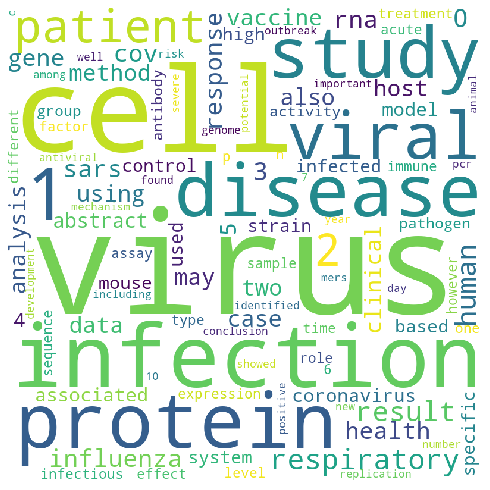

In [10]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stopwords, min_font_size = 10).generate_from_frequencies(wco) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 5) 
  
plt.show() 

  WE SEE THAT MOST COMMON WORDS ARE VIRUS,PROTEIN, INFECTION,CELL,...    
  TO GET A BETTER UNDERSTANDING LETS FIND THE TRIGRAM OF THE ABSTRACTS AND FIND THE MOST FREQUENTLY USED TRIGRAM 

In [11]:
# JOINING CLEANED TOKENIZED WORDS 
splfc=[]
s1 = " "
for i in l4:
  s1 = " "
  s1=s1.join(i)
  splfc.append (s1)
# print(splfc[1:5])
df["c_abstract"]=splfc

['emerging disease one infectious epidemic caused newly transmissible pathogen either appeared first time already existed human population capacity increase rapidly incidence well geographic range adapting human immune system emerging disease may trigger large scale pandemic spreading transnational spreading sars global outbreak h1n1 recent potential invasion avian influenza h7n9 study dynamic mediating transmission emerging disease spatial epidemiology networked metapopulation provides valuable modeling framework take spatially distributed factor consideration review elaborates latest progress spatial metapopulation dynamic discus empirical theoretical finding verify validity networked metapopulations application evaluating effectiveness disease intervention strategy well', 'germline variation immunoglobulin gene ig locus critical pathogen mediated immunity establishing complete reference sequence region problematic segmental duplication somatically rearranged source dna sequenced bac

### TRIGRAM VISULAIZATION:

In [12]:
vec = CountVectorizer(max_features=50,ngram_range=(3, 3),stop_words='english')
tricount=vec.fit_transform(splfc)

In [13]:
# print(bicount)
sum_words = tricount.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [14]:
print(words_freq)
words_freqd=dict(words_freq)

[('severe acute respiratory', 2843), ('acute respiratory syndrome', 2688), ('respiratory syndrome coronavirus', 1693), ('middle east respiratory', 1348), ('respiratory syndrome sars', 1343), ('east respiratory syndrome', 1340), ('polymerase chain reaction', 1255), ('respiratory syncytial virus', 1243), ('respiratory tract infection', 1224), ('coronavirus sars cov', 1220), ('coronavirus mers cov', 866), ('syndrome coronavirus mers', 765), ('play important role', 733), ('supplementary material available', 726), ('real time pcr', 723), ('electronic supplementary material', 713), ('online version article', 702), ('contains supplementary material', 700), ('material available authorized', 700), ('available authorized user', 700), ('supplementary material online', 682), ('material online version', 682), ('syndrome coronavirus sars', 649), ('lower respiratory tract', 644), ('infectious bronchitis virus', 629), ('porcine epidemic diarrhea', 626), ('innate immune response', 625), ('mers cov infe

In [15]:
a=[i[0] for i in words_freq]
b=[i[1] for i in words_freq]
a=a[0:20]
b=b[0:20]
a=a[::-1]
b=b[::-1]

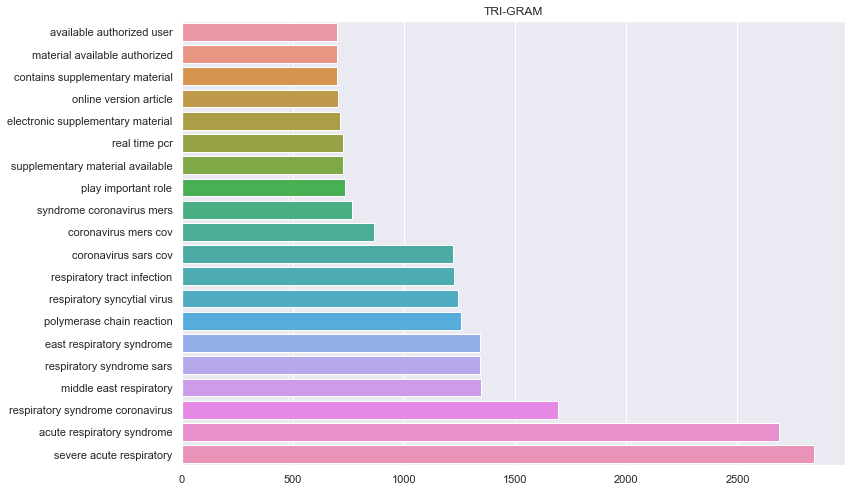

In [16]:
sns.set(color_codes=True)
plt.figure(figsize=(12,7))
sns.barplot(x=b,y=a)
plt.title("TRI-GRAM")
plt.tight_layout()
plt.show()

  HERE WE SEE THAT THE MOST COMMON TRI-GRAM WORDS ARE RELATED TO RESPIRATORY SYNDROMS-SARS,MERS.  

### ABSTRACT LENGTH:

In [17]:
abscount=[len(i) for i in l4]
df['word_count']=abscount

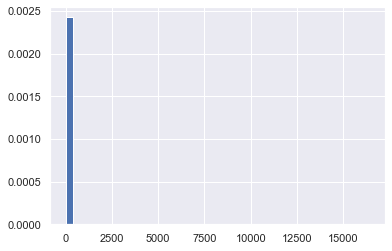

In [18]:
plt.hist(abscount,bins=40, density=True)
plt.show()

WE SEE THAT THE HISTOGRAM IS MESSED UP BECAUSE OF OUTLIERS.
SO LETS REMOVE THE OUTLIERS.

In [19]:
print("Before Dropping",df.shape)
ind=df[df['word_count']>500].index
dff=df.drop(axis=0,index=ind)
print("After Dropping",dff.shape)

Before Dropping (34809, 8)
After Dropping (34775, 8)


  THERE ARE ABOUT 35 SAMPLE DOCUMENTS WHICH WERE GREATER THAN THE LENGTH OF 500.    
  


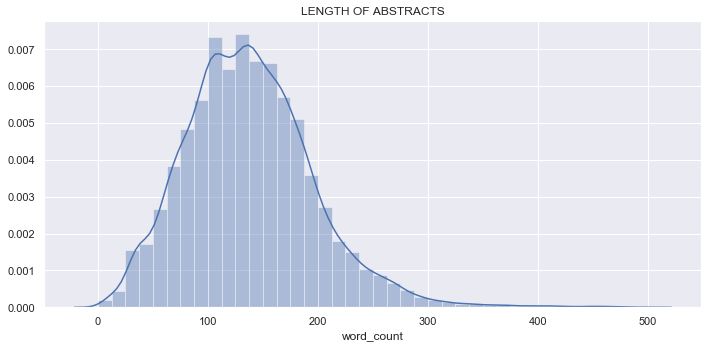

In [20]:
#HISTOGRAM
sns.set(color_codes=True)
plt.figure(figsize=(10,5))
sns.distplot(dff['word_count'],bins=40)
plt.title("LENGTH OF ABSTRACTS")
plt.tight_layout()
plt.show()

MOST OF THE ABSTRACT HAS A LENGTH LESS THAN 400.


### PUBLICATION YEAR:
  LETS HAVE A LOOK AT THE PUBLICATION YEAR OF ARTICLES

In [21]:
time=dff["publish_time"].astype('datetime64[ns]')
print(time[0])
print(time[0].year)

2014-01-10 00:00:00
2014


In [22]:
time=[i.year for i in time]
dff["time"]=time
t=dff["time"].value_counts()
t=t[::-1]
t.index

Int64Index([1971, 1972, 1974, 1970, 1973, 1975, 1976, 1977, 1978, 1980, 1979,
            1982, 1981, 1983, 1984, 1985, 1986, 1999, 1997, 1987, 1996, 1998,
            1989, 2000, 1988, 1990, 1994, 1993, 1992, 1995, 1991, 2002, 2001,
            2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
            2014, 2020, 2015, 2016, 2017, 2018, 2019],
           dtype='int64')

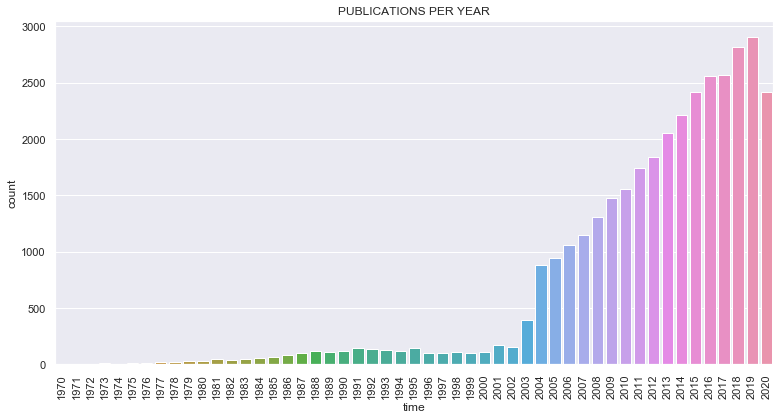

In [23]:
#PUBLICATION YEAR
plt.figure(figsize=(11,6))
ct=sns.countplot(x="time", data=dff)
ct.set_xticklabels(ct.get_xticklabels(), rotation=90)
plt.title("PUBLICATIONS PER YEAR")
plt.tight_layout()
plt.show()

  WE SEE THAT THERE IS A SIGNIFICANT INCREASE IN THE NUMBER OF DOCUMENTS PUBLISHED AFTER SARAS OUTBREAK IN 2002.   
  WE REMOVE THE ARTICLES WHICH WERE PUBLISHED BEFORE 2002 BECAUSE THEY MIGHT BE OUTDATATED

In [24]:
print("Before Dropping",dff.shape)
ind=dff[dff['time']<2000].index
dff=dff.drop(axis=0,index=ind)
print("After Dropping",dff.shape)

Before Dropping (34775, 9)
After Dropping (32731, 9)


# MODEL IMPLEMENTATION :

# HIERARCHIAL CLUSTERING FOR RISKS:
  HIERARCHIAL CLUSTERING IS ONE OF THE MOST COMMON UNSUPERVISED MACHINE LEARNING ALGORITHM. HERE WE APPLY HIERARCHIAL CLUSTERING FOR NLP DATA TO GET CLUSTERS OF RISKS WHICH WILL HOPEFULL HELP US GET SOME USEFUL INSIGHTS ABOUT THE MAJOR RISK FACTORS FOR PRESENT PANDEMIC COVID-19.

  WE HAVE CHOSEN TO ANALYZE RISK FACTORS BECAUSE PEOPLE WITH HIGH RISK FACTORS ARE MORE SUSCEPTABLE TO FALL SERIOUSLY ILL AND POTENTIALLY DIE BECAUSE OF COVID-19 AND WE ARE HOPING TO REDUCE THE MORTALITY RATE OF COVID BASED ON INSIGHTS FROM THE CLUSTERING.

 WE CREATE A LIST OF COMMON RISK FACTORS BASED ON THE DATA FROM INTERNET.
 WE GET THE FOLLOWING
 - OLD AGE
 - SOCIAL GATHERING OR  CROWDED PLACES
 - COMPROMISED IMMUNE SYSTEM
 
 APART FROM THAT PEOPLE WITH PRE EXISTING MEDICAL CONDITIONS ARE ALSO SUSCEPTABLE TO INFECTION SO WE LOOK AT THE LEADING CAUSES OF DEATH IN CANADA AS SHOWN BELOW

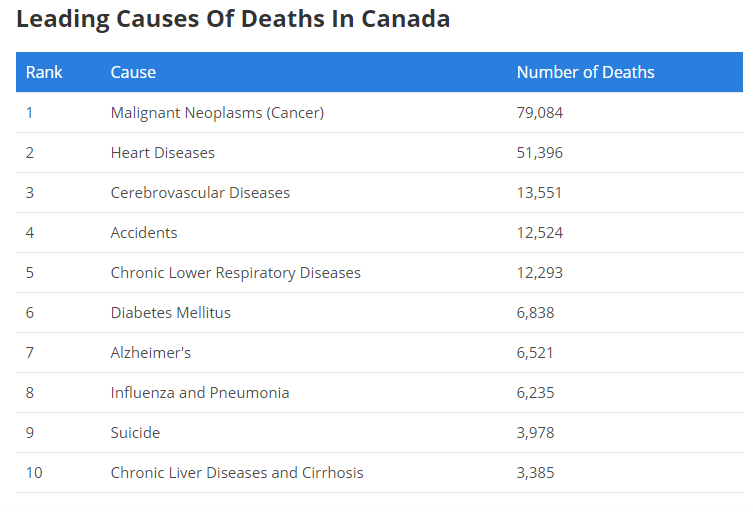

FROM THE LEADING CAUSES OF DEATH WE CAN TAKE
- CANCER
- HEART DISEASE
- CHRONIC LOWER RESPIRATORY DISEASE
- DIABETES



In [25]:
# WE HAVE THE FOLOWING RISK FACTORS
risks=['old age','compromised immune systems','social gatherings','crowded spaces',
       'cancer','heart disease','chronic lower respiratory diseases','diabetes']

In [26]:
# FUNCTION TO FIND THE RISK FACTORS IN ABSTRACT
def search(x,y):
  list=[]
  for sym in y:
    if sym in x:         
      list.append(sym)         
  return(list)

In [27]:
# STORING THE RISK FACTORS IN DATA FRAME
dff["search1"]=dff["abstract"].apply(lambda x: search(x,risks))

In [28]:
# FUNCTION TO CONVERT LIST TO SENTENCES
def join(clean_words):#to join words
          join=[]
          for word in clean_words:
                join.append(word)
                join.append(" ")
          return "".join(join)

In [29]:
# CONVERTING LIST OF RISKS TO SENTENCE
dff["search1"]=dff["search1"].apply(lambda x: join(x))

In [30]:
# FUNCTION TO CALCULATE DISTANCE MATRIX
# DISTANCE IS 0 IF THE RISKS APPEAR IN THE SAME ABSTRACT ELSE ITS 1
def dist(s1,s2,dff):
    cum_sum = 0
    number_of_papers = 1
    if s1 == s2: 
      return 0
    for search in dff:
        if ((s1 in search) and (s2 in search)):
            number_of_papers += 1
            cum_sum -= 0
        elif (((s1 in search) and (s2 not in search)) or ((s1 not in search) and (s2 in search))):
            number_of_papers += 1
            cum_sum += 1
    return cum_sum/number_of_papers

In [31]:
# DISTANCE MATRIX FOR RISKS
r_dist = np.zeros((len(risks),len(risks)),float)
for i in range(len(risks)):
    for j in range(len(risks)):
        r_dist[i][j] = dist(risks[i],risks[j], dff["search1"])**8

In [32]:
# STORING DISTANCE MATRIX IN DATAFRAME
df_r= pd.DataFrame(r_dist, columns=risks, index=risks) 

,old age,compromised immune systems,social gatherings,crowded spaces,cancer,heart disease,chronic lower respiratory diseases,diabetes
old age,0.000000,0.781787,0.775700,0.775700,0.992841,0.815245,0.775700,0.803769
compromised immune systems,0.781787,0.000000,0.100113,0.100113,0.992657,0.917147,0.100113,0.971379
social gatherings,0.775700,0.100113,0.000000,0.039018,0.992650,0.916281,0.039018,0.971277
crowded spaces,0.775700,0.100113,0.039018,0.000000,0.992650,0.916281,0.039018,0.971277
cancer,0.992841,0.992657,0.992650,0.992650,0.000000,0.894751,0.992650,0.717713
heart disease,0.815245,0.917147,0.916281,0.916281,0.894751,0.000000,0.916281,0.588420
chronic lower respiratory diseases,0.775700,0.100113,0.039018,0.039018,0.992650,0.916281,0.000000,0.971277
diabetes,0.803769,0.971379,0.971277,0.971277,0.717713,0.588420,0.971277,0.000000


C:\Users\aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


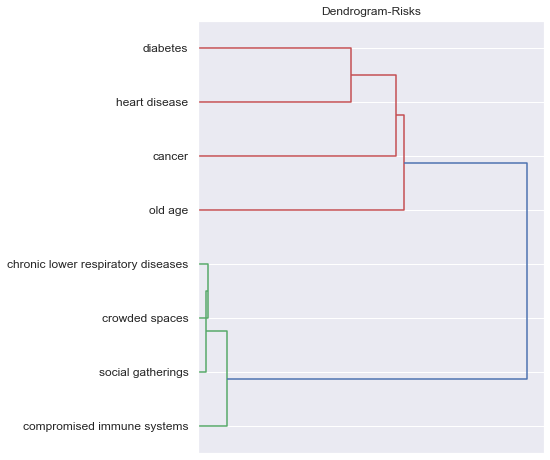

In [33]:
# Hierarchical Clustering
Y = sch.linkage(r_dist, method='centroid')
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])

# Get the dendrogram
Z1 = sch.dendrogram(Y, orientation='right')

ax1.set_xticks([])
labels = df_r.columns[Z1['leaves']]
ax1.set_yticklabels(labels)
ax1.set_title("Dendrogram-Risks")
plt.show()

## DISCUSSION AND GUIDENCE TO TACKLE OUTBREAK :
   WE GET TWO CLUSTER GROUPS FROM HIERARCHIAL CLUSTERING

**CLUSTER1:**
- SOCIAL GATHERING
- CROWDED SPACES
- CHRONIC LOWER RESPIRATORY DISEASE
- COMPROMISED IMMUNE SYSTEM

CLUSTER 1 REPRESENTS HIGH RISK FACTORS
  
**SOCIAL GATHERING AND CROWDED SPACES** ARE THE MAJOR CAUSE OF SPREAD OF COVID-19.

MANY COUNTRIES HAVE SHUTDOWN THE BODER AND ALSO MADE IT A RULE TO PRACTISE SOCIAL DISTANCING. SOME COUNTRIES LIKE INDIA ARE IN TOTAL LOCK DOWN TO PREVENT THE SPREAD OF DISEASE.
   
AS OF TODAY **IN ONTARIO NOT MORE THAN 5 PEOPLE CAN GATHER** IN GROUPS.
      
MANY OF US KNOW ABOUT PATIENT 31 OF SOUTH KOREA. PATIENT 31 WAS A SUPERSPREADER AND THAT PATIENT SPREAD THE VIRUS TO MANY PEOPLE CAUSING A SERIOUS OUT BREAK IN SOUTH KOREA. THIS EMPHASIZES THE IMPORTANCE OF SOCIAL DISTANCING. ALL IT TAKES IS ONE PERSON TO CAUSE A SERIOUS OUTBREAK.

WITH THE ABOVE EVENT IN MIND THE FOLLOWING **POLICY CHANGE** IS RECCOMENDED:  
     
1.  **COMPLETE LOCKDOWN IN ONTARIO:** PEOPLE ARE ONLY ALLOWED TO GO FOR FOOD AND MEDICAL PURCHASES AND THAT TOO BETWEEN MORNING 9AM TO EVENING 6PM. NOT MORE THAN 2 PEOPLE SHOULD GATHER IN GROUPS  

IN **NEW ZELAND** THE GOVERNMENT NOT ONLY MANAGED TO FLATTEN THE CURVE BUT HAVE **SQUSHED THE CURVE**. THE NUMPER OF POSTIVE CASES PER DAY IS LESS THAN THE NUMBER OF RECOVERED CASES.

SOURCE:https://www.washingtonpost.com/world/asia_pacific/new-zealand-isnt-just-flattening-the-curve-its-squashing-it/2020/04/07/6cab3a4a-7822-11ea-a311-adb1344719a9_story.html

APART FROM THIS PEOPLE WITH **RESPIRATORY DISORDER AND COMPROMISED IMMUNE SYSTEM** HAVE HIGH RISK OF DEVELOPING A SERIOUS CASE OF COVID-19   
   
THESE PEOPLE CAN ALSO DEVELOP DISEASES WITH SYMPTOMS WHICH ARE SIMILAR TO COVID. THIS RESULTS IN OVERBURDENING OF HOSPITAL SYSTEM AND WASTAGE OF COVID TEST KITS.
  
  GOVERMENT OF CANADA HAS RELEASED A SELF ASSESMENT TOOL.THIS TOOL WILL HELP TO REDUCE THE ABOVE EFFECT TO SOME EXTENT. 
   
   
**CLUSTER 2:**
- DIABETES 
- HEART DISEASE 
- CANCER
- OLD AGE
  
THE PEOPLE IN CLUTSER 2 HAVE A MODERATE RISK OF DEVELOPING COVID-19. THESE PEOPLE WILL BE IN NEED OF REGULAR MEDICATION BECAUSE OF THEIR CONDITIONS, SO THEY WILL BE REQUIERED TO VISIT THE PHARMACY REGULARLY.
  
AT PRESENT THE TREATMENT FOR COVID IS TREATING SYMPTOMS AND ONLY SERIOUS CASES ARE ADMITTED IN THE HOSPITAL. PEOPLE WITH  MILD SYMPTOMS ARE REQUIERD TO SELF ISOLATE AND EVEN THEY WILL NEED MEDICATION TO TREAT THE SYMPTOMS, WHICH REQUIER THEM OR PEOPLE CLOSE TO THEM(POSSIBLY INFECTED) TO VISIT THE PHARMACY.

WITH THE ABOVE TWO EVENTS IN MIND THE FOLLOWING **POLICY** IS PROPOSED:
2.   **DOOR DELIVERY OF DRUGS TO TREAT SYMPTOMS OF COVID-19, SALE OF SUCH DRUGS IN STORES WILL BE STOPPED AND DRUGS CAN ONLY BE ORDERED ONLINE FOR HOME DELIVERY**. 






# KMEANS CLUSTERING FOR SYMPTOMS:
  KMEANS IS ONE OF THE COMMON UNSUPERVISED MACHINE LEARNING ALGORITHM.LETS APPLY KMEANS CLUSTERING TO LIST OF SYMPTOMS AND FIND SOME USEFUL INSIGHTS ABOUT  IT.

    
  THE LIST FOR SYMPTOMS WAS CREATED USING THE DATA FROM INTERNET AND ALSO FROM THE FOLLOWING DIAGRAM 

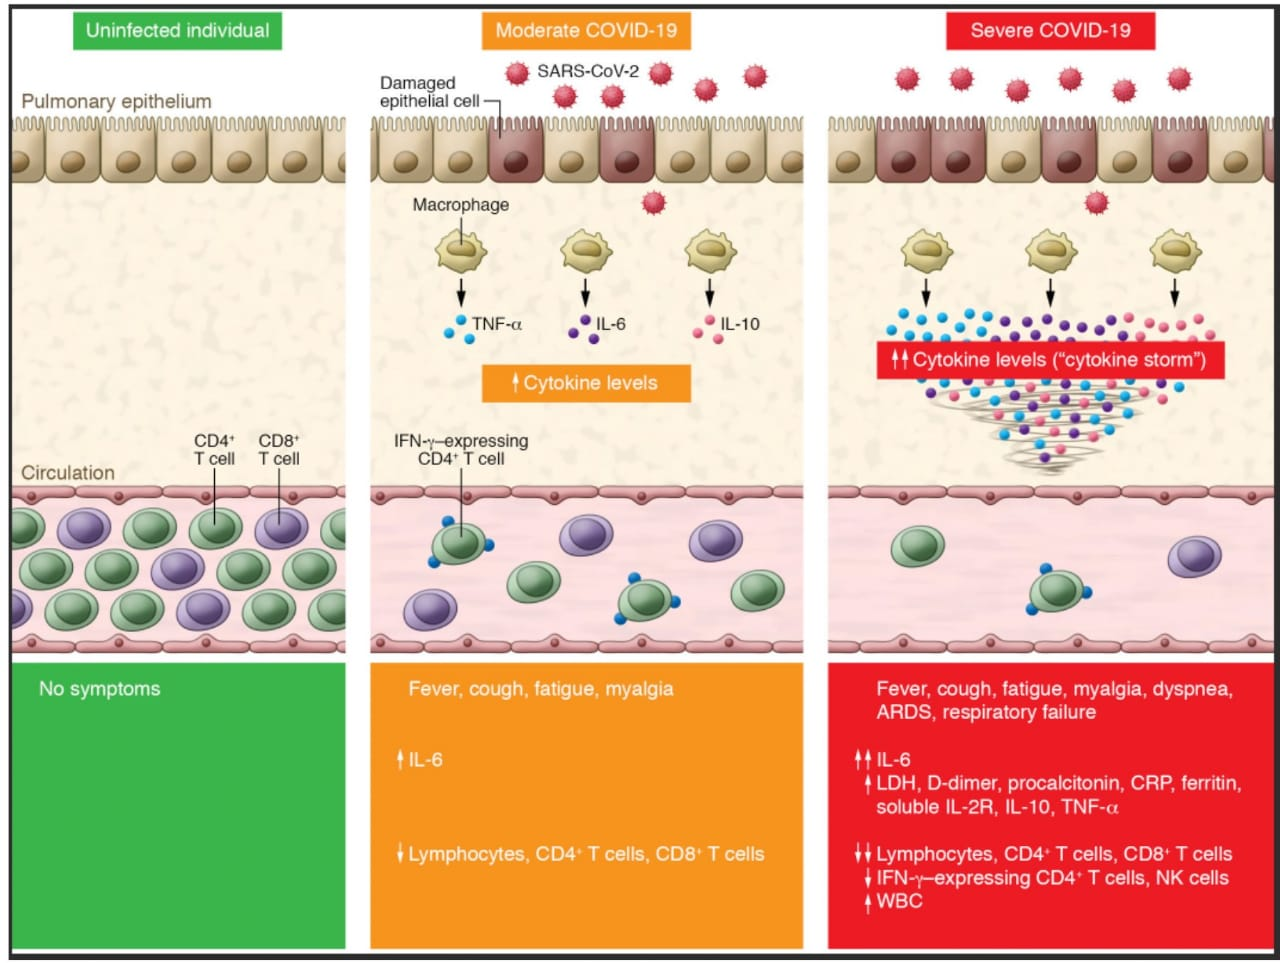

In [34]:
#LIST OF SYMTOMS
symptoms=['fever','cough',"fatigue",'myalgia','ards','respiratory failure','pneumonia',"headache","sore throat"]

In [35]:
#SEARCHING THE SYMPTOMS
dff["search"]=dff["abstract"].apply(lambda x: search(x,symptoms))
dff["search"]=dff["search"].apply(lambda x: join(x))

In [36]:
#CREATING DISTANCE MATRIX
symptom_dist = np.zeros((len(symptoms),len(symptoms)),float)
for i in range(len(symptoms)):
    for j in range(len(symptoms)):
        symptom_dist[i][j] = dist(symptoms[i],symptoms[j], dff["search"])**10

In [37]:
#STORING IN DATA FRAME
df_symptoms = pd.DataFrame(symptom_dist, columns=symptoms, index=symptoms) 

In [38]:
# CLUSTERING RESULTS
km1=KMeans(n_clusters=3,init='k-means++',n_init=100)
km1.fit_transform(df_symptoms)

w1=km1.labels_
for i in range (len(w1)):
  print("CLUSTER",w1[i],':',symptoms[i] )

CLUSTER 2 : fever
CLUSTER 2 : cough
CLUSTER 0 : fatigue
CLUSTER 0 : myalgia
CLUSTER 1 : ards
CLUSTER 1 : respiratory failure
CLUSTER 1 : pneumonia
CLUSTER 0 : headache
CLUSTER 0 : sore throat


## DISCUSSION AND GUIDENCE TO TACKLE OUTBREAK :

FROM KMEANS CLUSTERING WE GOT THE FOLLOWING 3 CLUSTERS:

**CLUSTER 0:**
- HEADACHE
- SORE THROAT
- FATIGUE
- MYALGIA

**CLUSTER 2:**
- FEVER
- COUGH

**CLUSTER 1:**
- PNEUMONIA
- ARDS(ACUTE RESPIRATORY DISTRESS SYNDROME)
- RESPIRATORY FAILURE

  CLUSTER 0 REPRESENTS THE SYMPTOMS OF MILDELY AFFECTED CASES   
  CLUSTER 2 REPRESENTS THE SYMPTOMS OF MODERATELY AFFECTED CASES    
  CLUSTER 1 REPRESENTS THE SYMPTOMS OF SERIOUS CASES   

FROM THESE INSIGHT WE CAN DRAW THE FOLLOWING **CONCLUSIONS:**

1. EVENTHOUGH CLUSTER 0 ARE SYMPTOMS OF CORONA, THEY ARE ALSO SYMTOMS OF MANY OTHER DISEASES, SO WE CAN SAY THAT PEOPLE SHOWING SYMPTOMS IN CLUTSER 0 SHOULD SELF ISOLATE AND WAIT TO SEE IF THIER SYMPTOMS ARE GETTING WORSE

2. PEOPLE HAVING SYMPTOMS IN CLUSTER 2 SHOULD DEFINITELY TAKE COVID TEST AND TAKE ACTIONS AS PER THEIR TEST RESULTS

3. PEOPLE SHOWING SYMPTOMS IN CLUSTER 1 SHOULD BE HOSPITALIZED

MAKING THESE CONCLUSION AS A MANDETORY RULES WILL DEFINITELY HELP IN DECRESING THE SPREAD OF COVID-19


# OTHER ASPECTS:

  APART FROM SYMPTOMS AND RISKS LETS ALSO LOOK AT PREVENTION,TRANSMISSION AND TREATMENT ASPECTS OF CORONA VIRUS.
   
 WE WILL COME UP WITH KEYWORDS FOR EACH OF THIS CATEGORY AND VISUALIZE THE OCCURENCE OF KEYWORD IN OUR DATASET. THE OCCURENCE OF THESE KEYWORDS IN THE DOCUMENT IS A INCATION OF IMPORTANCE OF THOSE WORDS.

### KEY WORDS:  

TRANSMISSION:'respiratory secretions', 'body fluids','physical contact',"direct contact","indirect contact","sexually transmitted"   
   
TREATMENT:'oxygen support','rest','treating symptoms','antiviral','social distancing'    
  
PREVENTION: 'face masks','eye protection','disposable gloves','hygiene','hand sanitizer','social distancing','quarantine','exercise'

In [39]:
#transmission
transmission=[ 'respiratory secretions', 'body fluids',
              'physical contact',"direct contact","indirect contact","sexually transmitted"]  
#treatment
treatment=['oxygen support','rest','treating symptoms','antiviral',
           'social distancing']
#prevention
prevention=['face masks','eye protection','disposable gloves','hygiene','hand sanitizer',
            'social distancing','quarantine','exercise']

In [40]:
def counts(param,dataf):
  count = dict((j,0) for j in param)
  for i in count:
      for abstract in dataf:
          if str(i) in abstract:
              count[i] += 1
  q1=[k for k,v in count.items()]
  q2=[v for k,v in count.items()]
  return(count,q1,q2)

In [41]:
#transmission
t,t1,t2=counts(transmission,dff["abstract"])

#treatment
tt,tt1,tt2=counts(treatment,dff["abstract"])

#prevention
p,p1,p2=counts(prevention,dff["abstract"])

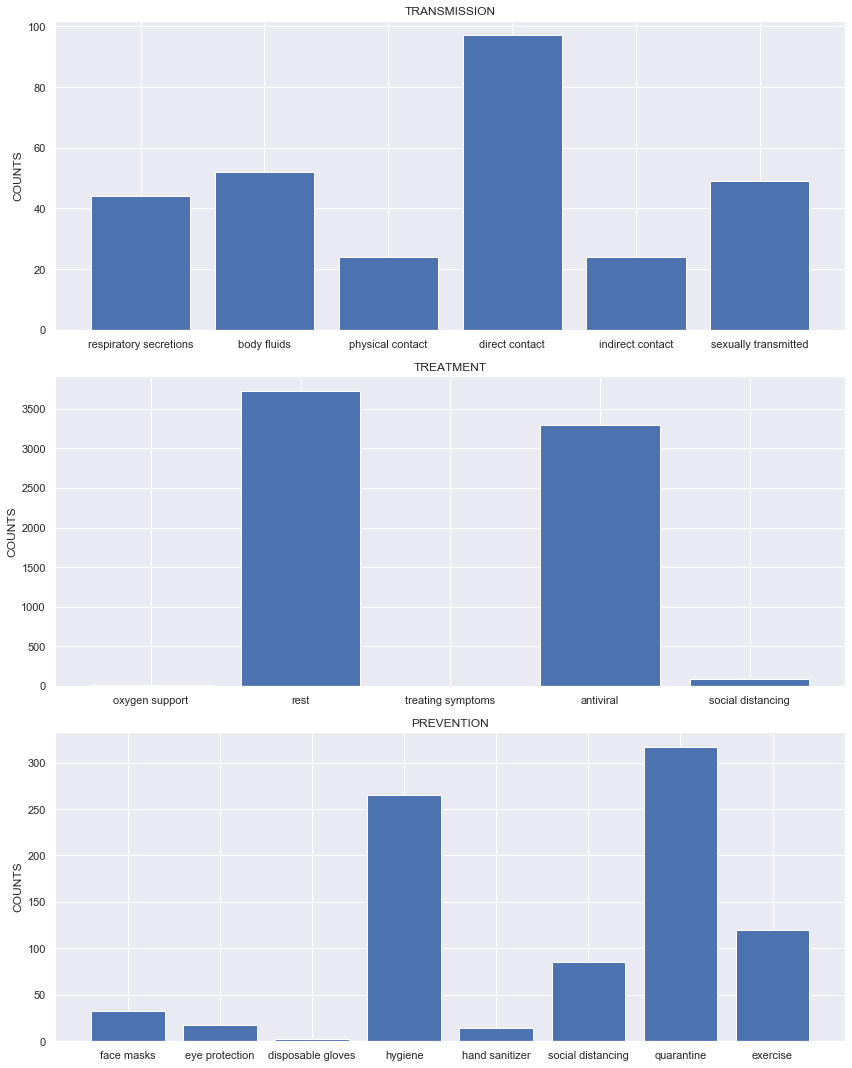

In [42]:
fig,ax=plt.subplots(3,1,figsize=(12,15))

ax[0].bar(x=t1,height=t2)
ax[1].bar(x=tt1,height=tt2)
ax[2].bar(x=p1,height=p2)

ax[0].set_title("TRANSMISSION")
ax[1].set_title("TREATMENT")
ax[2].set_title("PREVENTION")

ax[0].set_ylabel("COUNTS")
ax[1].set_ylabel("COUNTS")
ax[2].set_ylabel("COUNTS")

plt.tight_layout()
plt.show()


# DISCUSSION:


### TRANSMISSION:    
   FROM THE VISUALIZATION WE CAN SEE THAT THE MOST COMMON METHOD OF TRANSMISSION IS **DIRECT CONTACT** WITH THE INFECTED PERSON. APART FROM THAT IT IS ALSO TRANSMITTED THOUGH OTHER BODY FLUIDS. 

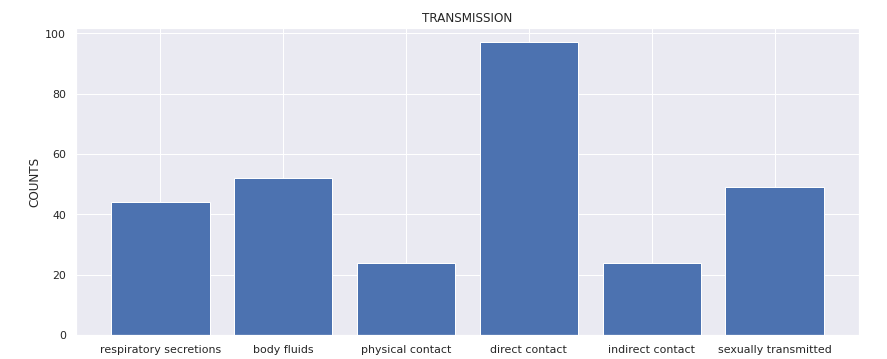

### TREATMENT:
  IT IS WELL KNOWN THAT THERE IS NO VACCINE OR DRUGS TO CURE COVID-19.  

  EVEN SARS WHICH HAD A OUTBREAK IN 2002 HAS NO VACCINE TILL DATE JUST LIKE MERS WHICH HAD A OUTBREAK IN 2012.

  AT PRESENT THE SYMPTOMS OF CORONA ARE TREATED AND IF THE HOST'S IMMUNE SYSTEM IS GOOD, THE HOST SURVIVES.

  OUR PLOT SHOWS THAT TAKING REST ALONG WITH ANTIVIRAL DRUGS TO TREAT THE SYMPTOMS IS THE BEST WAY TO GO ABOUT IN TREATING COVID-19   

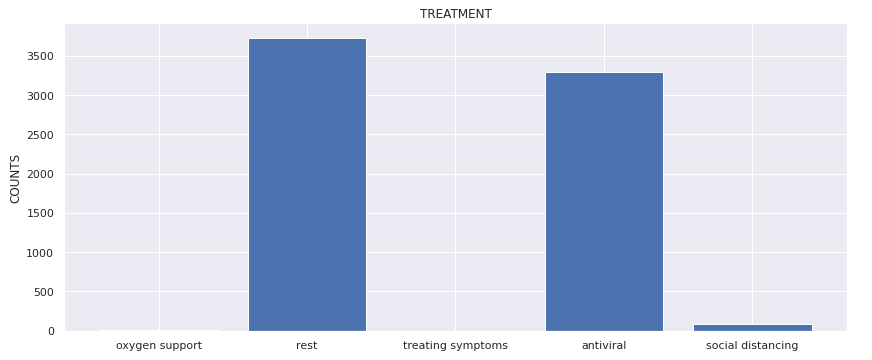

### PREVENTION:
  THE PLOT SHOWS THAT MAINTAINING GOOD HYGIENE  AND QUARENTINING YOURSELF HELPS IN PREVENTING CORONA

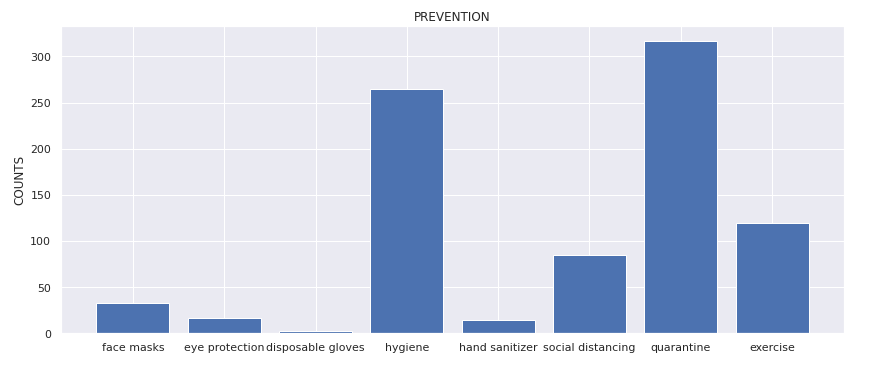

# CONCLUSION:
 TO CONCLUDE WE VISUALIZED THE ABSTRACTS USING WORD CLOUD AND TRIGRAMS WE ALSO LOOKED AT THE PUBLICATIONS OF THES DOCUMENTS BASED ON THE YEAR AND ALSO WE LOOKED AT THE LENGTH OF THE ABSTARCTS USING HISTOGRAM. AFTER THAT WE DID HIERARCHIAL CLUSTERING ON THE RISK FACTORS, WE CAME UP WITH 2 POLICY TO DECRESE THE SPEREAD OF COVID. APART FROM THAT WE DID KMEANS CLUSTERING ON THE SYMPTOMS AND WE CAME UP WITH THREE CLUSTERS WHICH WERE INDICATIVE OF THE STAGE OF COVID-19(MILD, MODERATE, SERIOUS). WE CAME UP WITH RULES FOR TESTING BASED ON THE SYMPTOMS SHOWED BY THE PATIENT. FINALLY WE LOOKED AT TRANSMISSION, PREVENTION AND TREATMENT OF COVID-19.